# Task: Predict the sales for the next 2 years 

In [97]:
import pandas as pd 

In [98]:
df = pd.read_csv(r"C:\Users\user\Desktop\new new\train.csv")

## Data Cleaning and Manipulation

In [99]:
def inspect_clean(data):
    data = data.copy()
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(" ","_")
    print(f"The columns in the dataset: {data.columns}")
    print()
    print('The structure and datatypes of the dataset:')
    print(data.info())
    print()
    print(f"There are {data.duplicated().sum()} duplicated rows in the dataframe")
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
        print("The duplicated rows were dropped")
    print()
    print("The missing values in the dataset")
    print(data.isna().sum())
    print()
    print("The statistical summary of the dataset")
    print(data.describe().T)
    return data
   

df = inspect_clean(df)




The columns in the dataset: Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

The structure and datatypes of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state      

## Feature Engineering 

In [100]:
def get_features(data):
    data = data[['order_date','sales']].copy()
    data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')
    data = data.set_index(data['order_date'])
    data.drop(['order_date'],axis=1, inplace=True)
    data = data.resample('M').sum()
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['year'] = data.index.year
    return data

df1 = get_features(df)

## Exploratory Data Analysis

In [101]:
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [135]:
def get_eda(data):
    print('The Daily Sales Trend:')
    print(data.groupby('day')['sales'].sum().sort_values(ascending=False))
    print()
    print('The Monthly Sales Trend:')
    print(data.groupby('month')['sales'].sum().sort_values(ascending=False))
    print()
    print('The Yearly Sales Trend:')
    print(data.groupby('year')['sales'].sum().sort_values(ascending=False))

get_eda(df1)

The Daily Sales Trend:
day
31    1.269780e+06
30    9.323856e+05
28    4.741970e+04
29    1.195141e+04
Name: sales, dtype: float64

The Monthly Sales Trend:
month
11    350161.7110
12    321480.1695
9     300103.4117
10    199496.2947
3     197573.5872
8     157315.9270
5     154086.7237
6     145837.5233
7     145535.6890
4     136283.0006
1      94291.6296
2      59371.1154
Name: sales, dtype: float64

The Yearly Sales Trend:
year
2018    722052.0192
2017    600192.5500
2015    479856.2081
2016    459436.0054
Name: sales, dtype: float64


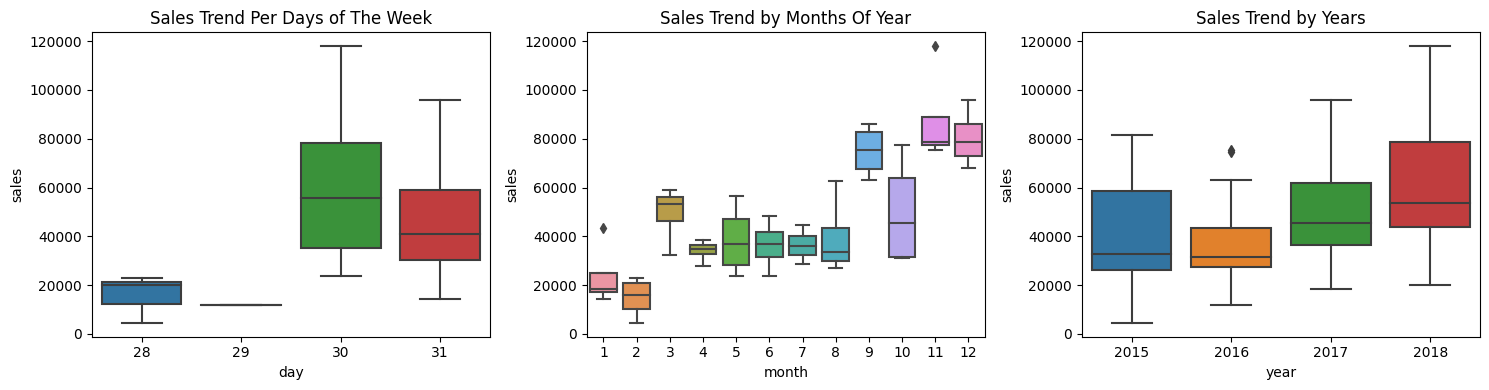

In [123]:
def plot_eda(data):
    fig, ax = plt.subplots(1,3, figsize=(15,4))
    sns.boxplot(data=df1,x= df1.day, y= df1.sales, ax=ax[0])
    ax[0].set_title('Sales Trend Per Days of The Week')
    sns.boxplot(data=df1,x= df1.month, y= df1.sales, ax=ax[1])
    ax[1].set_title('Sales Trend by Months Of Year')
    sns.boxplot(data=df1,x= df1.year, y= df1.sales,ax=ax[2])
    ax[2].set_title('Sales Trend by Years')
    plt.tight_layout()
plot_eda(df1)

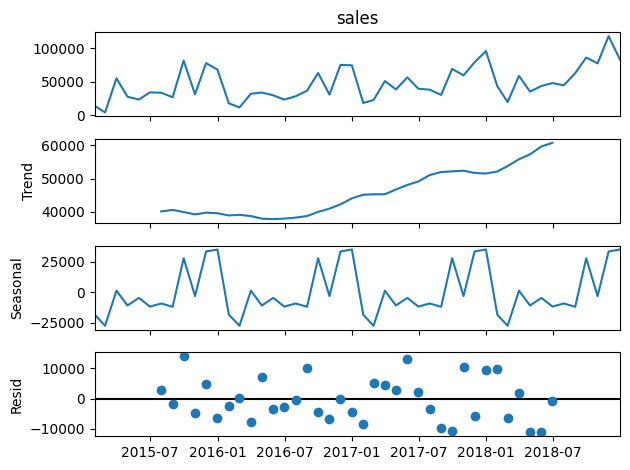

In [103]:
seasonal_decomposition = seasonal_decompose(df1.sales)
seasonal_decomposition.plot()
plt.show()

## Checking Stationarity Using Adfuller 

In [105]:
from statsmodels.tsa.stattools import adfuller, pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
adf_test = adfuller(df1.sales)
adf_test

(-4.416136761430769,
 0.00027791039276670623,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 847.3050446881931)

## Checking the Auto Regressiveness and Moving Average

In [143]:
def get_arma_values(data):
    print('The Auto Regression Values:')
    print(pacf(data.sales))
    print()
    print('The Moving average Values:')
    print(acf(data.sales))
   
get_arma_values(df1)


The Auto Regression Values:
[ 1.          0.38104342  0.02703528  0.14194669 -0.21851077 -0.03117936
  0.15273203 -0.26144773  0.1640394  -0.07619089  0.09549414  0.31701433
  0.69452024 -0.31410964 -0.63847675 -0.27145289  0.6670397 ]

The Moving average Values:
[ 1.          0.37310501  0.16129133  0.18182543 -0.05678393 -0.09086084
  0.06979553 -0.15412401 -0.03250541  0.02165684 -0.01842194  0.20647836
  0.55653436  0.21163697  0.03906873  0.03845985 -0.07937112]


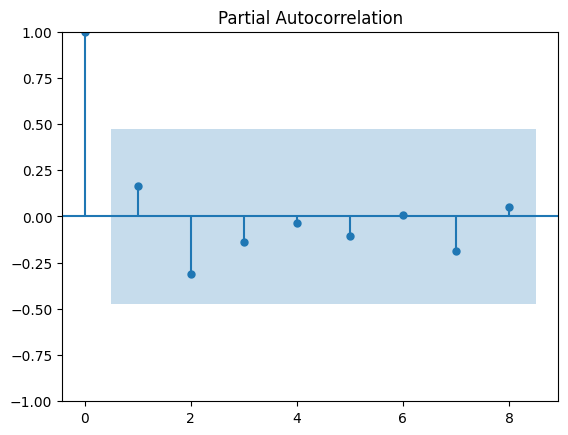

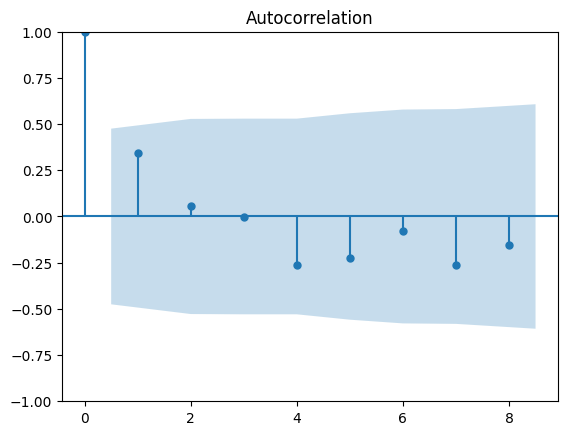

In [107]:
pacf_plot = plot_pacf(auto_regression_values)
pacf_plot
acf_plot = plot_acf(moving_average_values)
acf_plot
plt.show()

## Splitting The Dataset into Training and Testing Sets 

In [148]:
def split(data):
    a = data.sales.loc[data.index < '01/01/2018']
    b = data.sales.loc[data.index >= '01/01/2018']
    return a, b 
training_set, testing_set = split(df1)

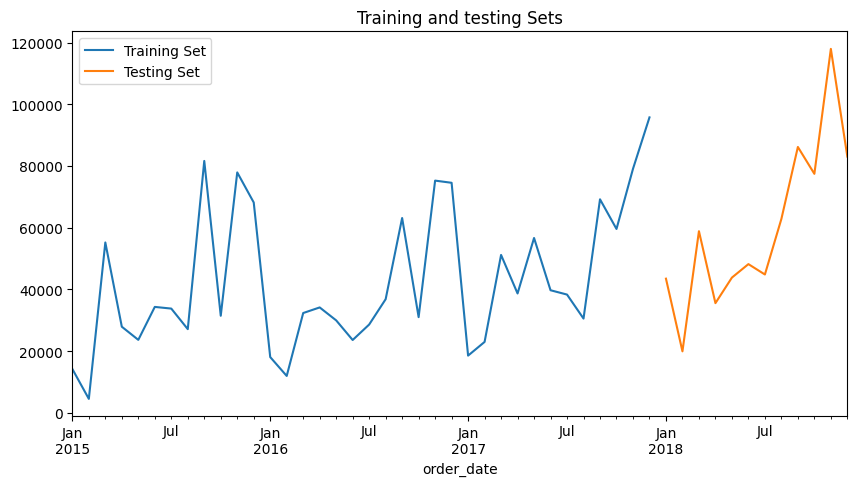

In [149]:
def plot_sets(a, b):
    fig, ax = plt.subplots(figsize=(10,5))
    a.plot(ax = ax, label= "Training Set")
    b.plot(ax = ax, label = 'Testing Set' )
    ax.legend(['Training Set', 'Testing Set'])
    ax.set_title('Training and testing Sets')
    plt.show()
plot_sets(training_set, testing_set)

## Building SARIMAX Model for Time Series Forecast 

In [151]:
def get_forecast():
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
    model = SARIMAX(training_set, order=(0,1,0), seasonal_order=(0,1,0,12)).fit()
    testing_steps = len(testing_set)
    testing_forecast = model.forecast(testing_steps)
    return testing_forecast

get_forecast()

2018-01-31     39738.0108
2018-02-28     44174.3348
2018-03-31     72360.5788
2018-04-30     59875.2868
2018-05-31     77852.4278
2018-06-30     60920.0058
2018-07-31     59516.3028
2018-08-31     51737.7201
2018-09-30     90388.9107
2018-10-31     80778.5528
2018-11-30    100262.0156
2018-12-31    116934.6408
Freq: M, Name: predicted_mean, dtype: float64

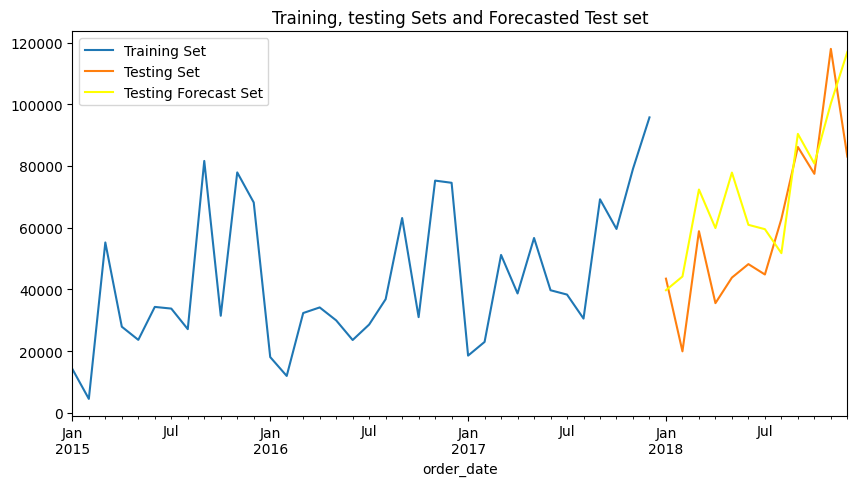

In [152]:
def plot_forecast():
    fig, ax = plt.subplots(figsize=(10,5))
    training_set.plot(ax = ax, label= "Training Set")
    testing_set.plot(ax = ax, label = 'Testing Set' )
    testing_forecast.plot(ax = ax, label = 'Testing Forecast Set', color='yellow')
    ax.legend(['Training Set', 'Testing Set', 'Testing Forecast Set'])
    ax.set_title('Training, testing Sets and Forecasted Test set')
    plt.show()

plot_forecast()

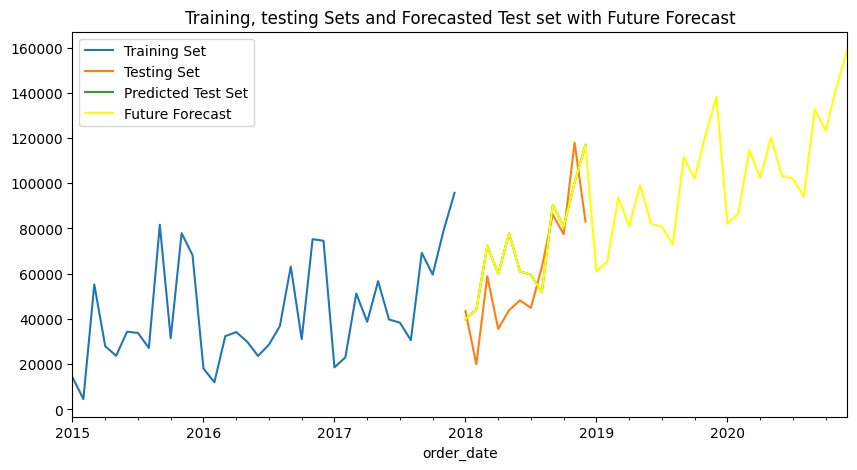

In [122]:
def future_forecast():
    future_forecast = model.forecast(step=36)
    fig, ax = plt.subplots(figsize=(10,5))
    training_set.plot(ax = ax, label= "Training Set")
    testing_set.plot(ax = ax, label = 'Testing Set' )
    sales_forecast.plot(ax = ax, label = 'Predicted Test Set')
    future_forecast.plot(ax = ax, label = 'Future Set', color='yellow')
    ax.legend(['Training Set', 'Testing Set', 'Predicted Test Set', 'Future Forecast'])
    ax.set_title('Training, testing Sets and Forecasted Test set with Future Forecast')
    plt.show()

future_forecast()

## Model Evaluation 

In [159]:
def evaluate_model():
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
    print(f"The MAE of the model is {mean_absolute_error(testing_set,sales_forecast)}")
    print(f"The MAPE of the model is {mean_absolute_percentage_error(testing_set,sales_forecast)}")
    print(f"The MSE of the model is {mean_squared_error(testing_set,sales_forecast)}")


evaluate_model()

The MAE of the model is 16459.685783333323
The MAPE of the model is 0.3677263925232454
The MSE of the model is 377195390.05020213
